In [1]:
#Imports:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df_orders = pd.read_csv(r"C:\Users\omogh\Desktop\data mining 2 project\orders.csv", sep = "|")
df_items = pd.read_csv(r"C:\Users\omogh\Desktop\data mining 2 project\items.csv", sep = "|")
df_category = pd.read_csv(r"C:\Users\omogh\Desktop\data mining 2 project\category_hierarchy.csv", sep = "|")

df_orders.head(5)

,date,userID,itemID,order
0,2020-06-01,38769,3477,1
1,2020-06-01,42535,30474,1
2,2020-06-01,42535,15833,1
3,2020-06-01,42535,20131,1
4,2020-06-01,42535,4325,1


In [3]:
result = pd.merge(df_orders, df_items, on="itemID")
result.head(5)

,date,userID,itemID,order,brand,feature_1,feature_2,feature_3,feature_4,feature_5,categories
0,2020-06-01,38769,3477,1,186,6,0,196,0,45,"[74, 4109, 3867, 803, 4053]"
1,2020-06-01,23570,3477,1,186,6,0,196,0,45,"[74, 4109, 3867, 803, 4053]"
2,2020-06-01,23495,3477,1,186,6,0,196,0,45,"[74, 4109, 3867, 803, 4053]"
3,2020-06-01,26073,3477,1,186,6,0,196,0,45,"[74, 4109, 3867, 803, 4053]"
4,2020-06-01,34302,3477,1,186,6,0,196,0,45,"[74, 4109, 3867, 803, 4053]"


C:\Users\omogh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


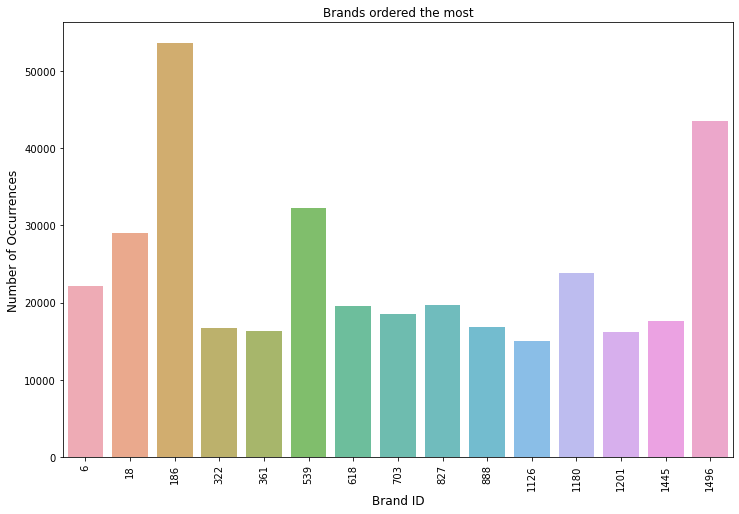

186     53573
1496    43485
539     32209
18      28997
1180    23831
6       22164
827     19762
618     19525
703     18566
1445    17683
888     16837
322     16726
361     16309
1201    16264
1126    15049
Name: brand, dtype: int64

In [10]:
#Most popular brand
cnt_srs = result['brand'].value_counts().head(15)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Brand ID', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Brands ordered the most")
plt.show()
cnt_srs













C:\Users\omogh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


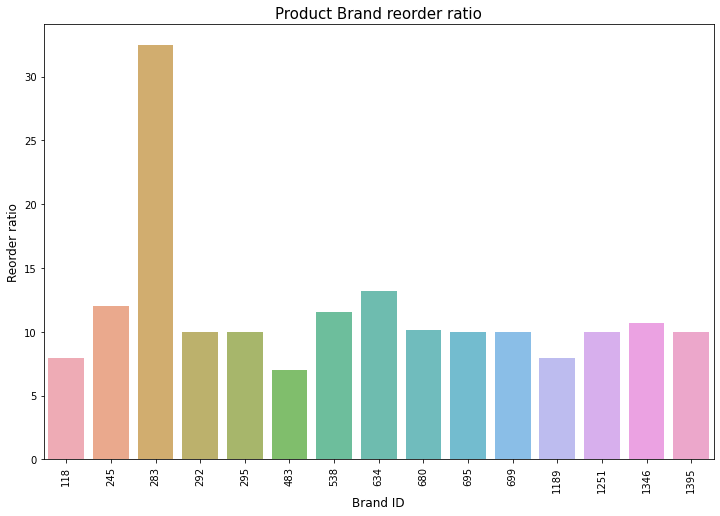

,brand,order
276,283,32.466667
616,634,13.200000
241,245,12.000000
523,538,11.571429
1321,1346,10.681818
662,680,10.125000
1370,1395,10.000000
681,699,10.000000
677,695,10.000000
1226,1251,10.000000


In [18]:
# Average reorder ratio of product brands ?


# get avg reordered per brand id
grouped_df = result.groupby(["brand"])["order"].aggregate("mean").reset_index()

# sort from highest to smallest, and get top15 only
grouped_df = grouped_df.sort_values('order', ascending=False).head(15)


plt.figure(figsize=(12,8))
sns.barplot(grouped_df['brand'].values, grouped_df['order'].values, alpha=0.8)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Brand ID', fontsize=12)
plt.title("Product Brand reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()
grouped_df


